In [199]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from math import sqrt
from sklearn.linear_model import LinearRegression

In [200]:
def regression_ceof(pts):
    X = np.array([pt[0] for pt in pts]).reshape(-1, 1)
    y = np.array([pt[1] for pt in pts])
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0], model.intercept_

def pythag(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)

def local_min_max(pts):
    local_min = []
    local_max = []
    prev_pts = [(0, pts[0]), (1, pts[1])]
    for i in range(1, len(pts) - 1):
        append_to = ''
        if pts[i-1] > pts[i] < pts[i+1]:
            append_to = 'min'
        elif pts[i-1] < pts[i] > pts[i+1]:
            append_to = 'max'
        if append_to:
            if local_min or local_max:
                prev_distance = pythag(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythag(prev_pts[1], (i, pts[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, pts[i])
                if append_to == 'min':
                    local_min.append((i, pts[i]))
                else:
                    local_max.append((i, pts[i]))
    return local_min, local_max

In [204]:
## Load files
def load_and_prepare_data(folder_path):
    """Loads and prepares data from CSV files in a given folder."""
    data_frames = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            instrument_name = file_name.split(".csv")[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            asset_name = instrument_name.split("_")[0]
            data_frames[asset_name] = df
    return data_frames

folder_path = 'RawDataDoNotModify'
data_frames = load_and_prepare_data(folder_path)

In [205]:
df = data_frames['BTCUSD']

In [206]:
df = df.head(2000)

## 1. Build TrendLine based data


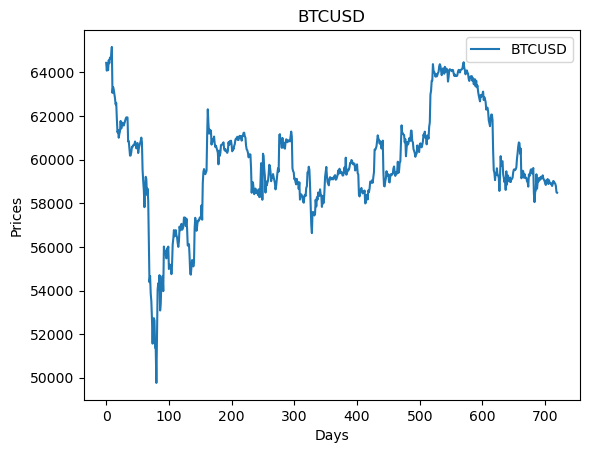

In [101]:
symbol = 'BTCUSD'
series = df['Close']
series.index = np.arange(series.shape[0])
plt.title("BTCUSD")
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label='BTCUSD')
plt.legend()

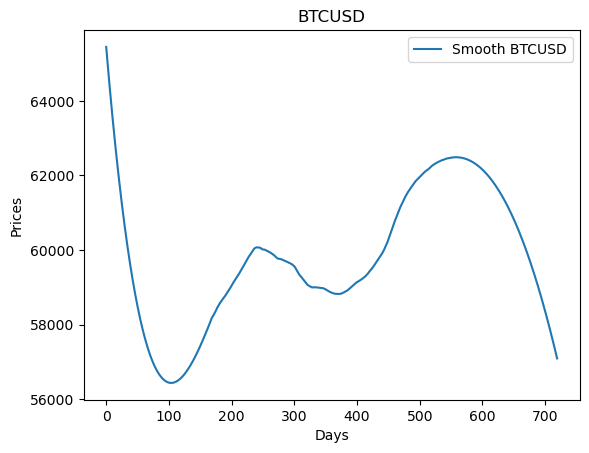

In [102]:
smooth = 336
pts = savgol_filter(series, smooth, 3)
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()

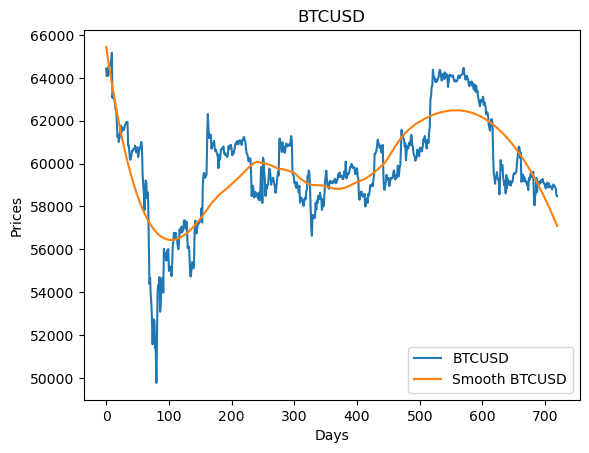

In [103]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()

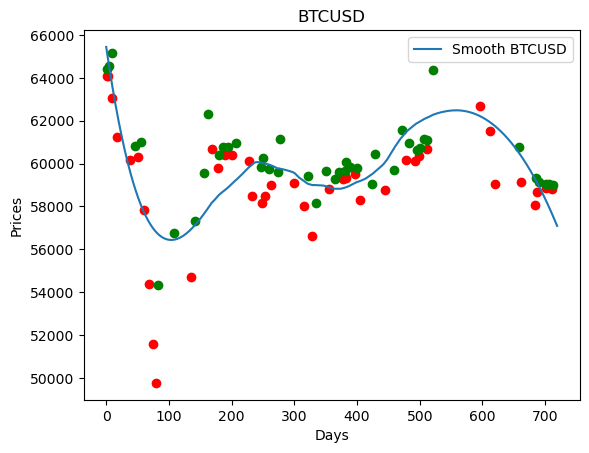

In [104]:
local_min, local_max = local_min_max(series)
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
for pt in local_min:
    plt.scatter(pt[0], pt[1], c='r')
for pt in local_max:
    plt.scatter(pt[0], pt[1], c='g')
plt.legend()

In [105]:
local_min_slope, local_min_int = regression_ceof(local_min)
local_max_slope, local_max_int = regression_ceof(local_max)
support = (local_min_slope * np.array(series.index)) + local_min_int
resistance = (local_max_slope * np.array(series.index)) + local_max_int

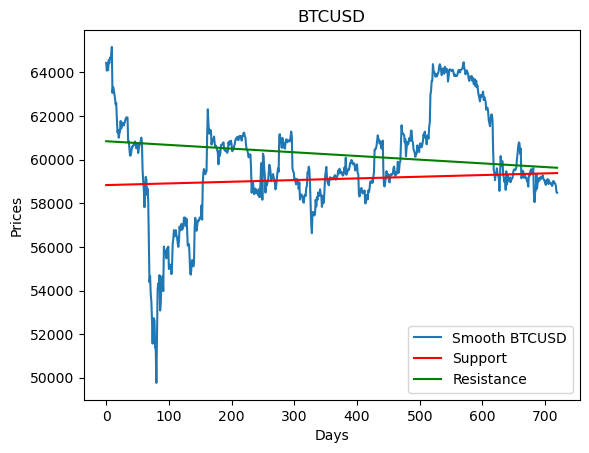

In [106]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=f'Smooth {symbol}')
plt.plot(support, label='Support', c='r')
plt.plot(resistance, label='Resistance', c='g')
plt.legend()

In [107]:
def support_resistance(df, smoothness=168):
    series = df['Close']
    series.index = np.arange(series.shape[0])
    pts = savgol_filter(series, smoothness, 3)
    local_min, local_max = local_min_max(pts)
    local_min_slope, local_min_int = regression_ceof(local_min)
    local_max_slope, local_max_int = regression_ceof(local_max)
    support = (local_min_slope * np.array(series.index)) + local_min_int
    resistance = (local_max_slope * np.array(series.index)) + local_max_int

In [108]:
support.shape

(720,)

In [109]:
resistance.shape

(720,)

In [110]:
!pip install trendln


  Preparing metadata (setup.py) ... done
  Obtaining dependency information for findiff>=0.7.0 from https://files.pythonhosted.org/packages/0c/a7/e3edd4b234697d1bf15b5a7cd4a45588df7198aacd68e47122a02b4d3f94/findiff-0.10.2-py3-none-any.whl.metadata
  Created wheel for trendln: filename=trendln-0.1.10-py2.py3-none-any.whl size=19515 sha256=b89792ee30313bae9917dd8b39932d0475e7d28e72f4ad2f2d6a31a7809ade0e
  Stored in directory: /Users/harshatamatam/Library/Caches/pip/wheels/c6/c4/ee/658cb922397973b1982efb982e71d54820cd2e5471a2ba5c43
Successfully built trendln


In [132]:
df.head()

,Local time,Open,High,Low,Close,Volume
40199,02.08.2024 00:00:00.000 GMT-0400,64566,64575,64353,64441,0.0146
40200,02.08.2024 01:00:00.000 GMT-0400,64441,64478,64016,64085,0.0155
40201,02.08.2024 02:00:00.000 GMT-0400,64085,64589,63772,64418,0.0202
40202,02.08.2024 03:00:00.000 GMT-0400,64418,64468,64092,64104,0.0178
40203,02.08.2024 04:00:00.000 GMT-0400,64095,64557,63967,64557,0.0162


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc

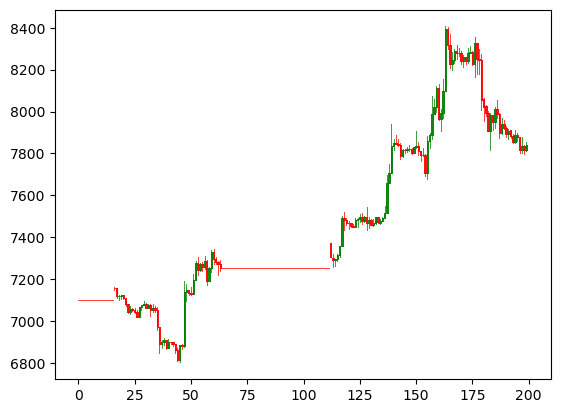

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc

def createZigZagPoints(dfSeries, minSegSize=10, sizeInDevs=0.5):
    """
    Identify zigzag points in the series based on retracement size.
    """
    minRetrace = minSegSize
    curVal = dfSeries.iloc[0]
    curPos = dfSeries.index[0]
    curDir = 1
    dfRes = pd.DataFrame(index=dfSeries.index, columns=["Dir", "Value"])
    
    for ln in dfSeries.index:
        if (dfSeries.loc[ln] - curVal) * curDir >= 0:
            curVal = dfSeries.loc[ln]
            curPos = ln
        else:
            retracePrc = abs((dfSeries.loc[ln] - curVal) / curVal * 100)
            if retracePrc >= minRetrace:
                dfRes.loc[curPos, 'Value'] = curVal
                dfRes.loc[curPos, 'Dir'] = curDir
                curVal = dfSeries.loc[ln]
                curPos = ln
                curDir = -1 * curDir
                
    dfRes['Value'] = dfRes['Value'].astype(float)
    return dfRes.dropna()

def plot_support_resistance(df, args):
    """
    Plots support and resistance levels based on zigzag points and arguments.
    """
    dfRes = createZigZagPoints(df['Close']).dropna()
    
    fig, ax = plt.subplots()
    candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], 
                      width=0.6, colorup='g', colordown='r')
    
    plt.plot(dfRes['Value'])
    removed_indexes = []
    x_max = 0
    
    for index, row in dfRes.iterrows():
        if index not in removed_indexes:
            dropindexes = [index]
            counter = 0
            values = [row.Value]
            startx, endx = index, index
            direction = row.Dir
            
            for index2, row2 in dfRes.iterrows():
                if index2 not in removed_indexes:
                    if index != index2 and abs(index2 - index) < args['time'] and row2.Dir == direction:
                        if abs((row.Value / row2.Value) - 1) < (args['dif'] / 100):
                            dropindexes.append(index2)
                            values.append(row2.Value)
                            startx = min(startx, index2)
                            endx = max(endx, index2)
                            counter += 1
            
            if counter > args['number']:
                avg_value = sum(values) / len(values)
                print(f"Support at: {', '.join(f'{v:.2f}' for v in values)}")
                removed_indexes.extend(dropindexes)
                if endx > x_max:
                    x_max = endx
                plt.hlines(y=avg_value, xmin=startx, xmax=endx, linewidth=1, color='r')
    
    if x_max > args['min']:
        plt.title("Support and Resistance")
        plt.show()

# Example usage
if __name__ == "__main__":
    # Sample OHLC DataFrame

    # Arguments for support/resistance detection
    args = {
        'dif': 5,       # Max % difference to group points
        'time': 200,       # Max bars between points
        'number': 50,       # Min number of points for a line
        'min': 0           # Min bars from start to display
    }

    plot_support_resistance(df, args)


In [183]:
dfRes = createZigZagPoints(df['Close']).dropna()

In [184]:
dfRes

,Dir,Value


In [179]:
import numpy as np
import pandas as pd

def find_support_resistance_optimized(zigzag, price_diff=1, time_diff=50, min_points=2):
    """
    Optimized function to identify support and resistance levels from zigzag points.
    
    Args:
        zigzag (pd.DataFrame): Zigzag DataFrame with 'Value' and 'Dir' columns.
        price_diff (float): Maximum percentage price difference for grouping.
        time_diff (int): Maximum time difference (index units) for grouping.
        min_points (int): Minimum points required to confirm a level.

    Returns:
        support_levels (list): List of identified support levels.
        resistance_levels (list): List of identified resistance levels.
    """
    # Sort by Value for easier grouping
    zigzag = zigzag.sort_values('Value').reset_index()

    # Pre-calculate price ranges for efficient filtering
    price_tolerance = zigzag['Value'] * price_diff
    support_levels, resistance_levels = [], []

    # Use a sliding window approach for grouping
    for i in range(len(zigzag)):
        # Skip if already visited
        if pd.isna(zigzag.at[i, 'Value']):
            continue
        
        group = [i]
        cur_value = zigzag.at[i, 'Value']
        cur_dir = zigzag.at[i, 'Dir']

        # Find all points within the price tolerance
        price_range_min = cur_value - price_tolerance[i]
        price_range_max = cur_value + price_tolerance[i]
        
        for j in range(i + 1, len(zigzag)):
            # Stop searching if price exceeds range (due to sorting)
            if zigzag.at[j, 'Value'] > price_range_max:
                break
            
            # Check time difference and direction match
            if abs(zigzag.at[j, 'index'] - zigzag.at[i, 'index']) <= time_diff and zigzag.at[j, 'Dir'] == cur_dir:
                group.append(j)
                # Mark as visited
                zigzag.at[j, 'Value'] = np.nan
        
        # Only keep groups with enough points
        if len(group) >= min_points:
            avg_price = zigzag.loc[group, 'Value'].mean()
            if cur_dir > 0:
                resistance_levels.append(avg_price)
            else:
                support_levels.append(avg_price)
    
    return sorted(support_levels), sorted(resistance_levels)

support_levels,resistance_levels =  find_support_resistance_optimized(dfRes)

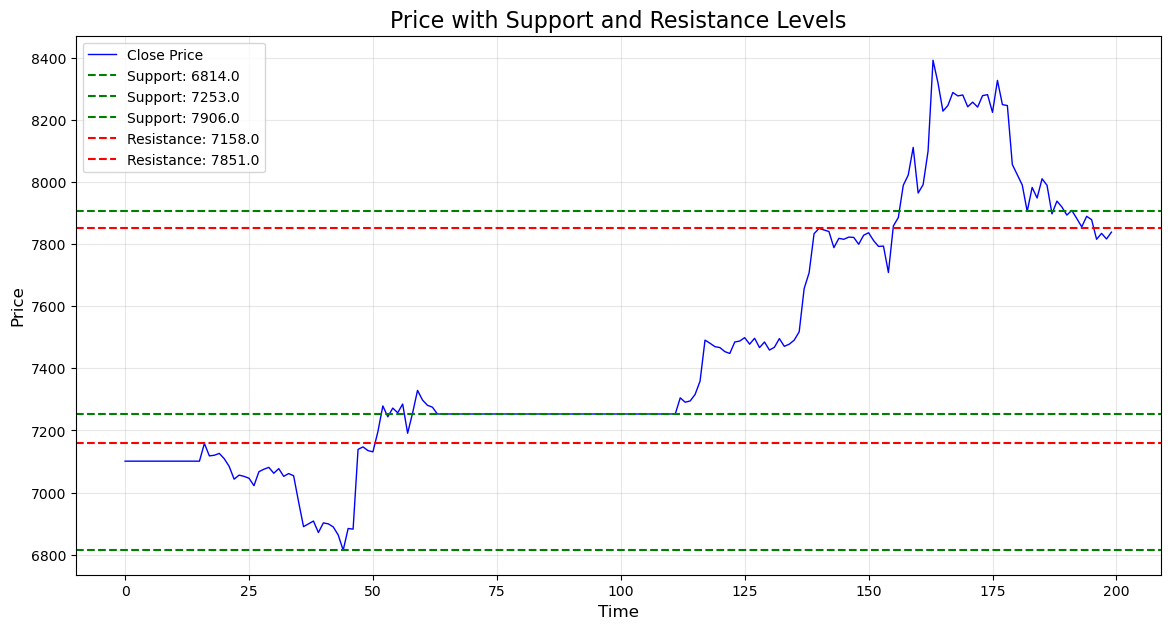

In [180]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1)

# Plot support levels
for level in sorted(support_levels):
    plt.axhline(y=level, color='green', linestyle='--', label=f'Support: {level}')

# Plot resistance levels
for level in sorted(resistance_levels):
    plt.axhline(y=level, color='red', linestyle='--', label=f'Resistance: {level}')

# Add labels, legend, and title
plt.title('Price with Support and Resistance Levels', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [181]:
def createZigZagPoints(dfSeries, minSegSize=10, sizeInDevs=0.5):
    """
    Identify zigzag points in the series based on retracement size.
    """
    minRetrace = minSegSize
    curVal = dfSeries.iloc[0]
    curPos = dfSeries.index[0]
    curDir = 1
    dfRes = pd.DataFrame(index=dfSeries.index, columns=["Dir", "Value"])
    
    for ln in dfSeries.index:
        if (dfSeries.loc[ln] - curVal) * curDir >= 0:
            curVal = dfSeries.loc[ln]
            curPos = ln
        else:
            retracePrc = abs((dfSeries.loc[ln] - curVal) / curVal * 100)
            if retracePrc >= minRetrace:
                dfRes.loc[curPos, 'Value'] = curVal
                dfRes.loc[curPos, 'Dir'] = curDir
                curVal = dfSeries.loc[ln]
                curPos = ln
                curDir = -1 * curDir
                
    dfRes['Value'] = dfRes['Value'].astype(float)
    return dfRes.dropna()

In [208]:
import pandas as pd

def createZigZagPoints(df, price_col, minSegSize=1):
    """
    Identify zigzag points in the series based on retracement size and add results to the original DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing the price data.
        price_col (str): Column name in the DataFrame for the price series (e.g., 'Close').
        minSegSize (float): Minimum percentage retracement size to detect a zigzag point.

    Returns:
        pd.DataFrame: The input DataFrame with new columns:
                      - 'Zigzag_Value': Detected zigzag points (NaN otherwise).
                      - 'Zigzag_Dir': Direction of the zigzag point (1 for upward, -1 for downward, NaN otherwise).
    """
    # Initialize variables
    curVal = df[price_col].iloc[0]
    curPos = df.index[0]
    curDir = 1  # Start with an upward trend

    # Add columns for zigzag points to the DataFrame
    df['Zigzag_Value'] = pd.NA
    df['Zigzag_Dir'] = pd.NA

    # Iterate over the DataFrame
    for i in range(1, len(df)):
        price = df[price_col].iloc[i]
        # Check if the direction is continuing or reversing
        if (price - curVal) * curDir >= 0:
            # Update the current value and position as the trend continues
            curVal = price
            curPos = df.index[i]
        else:
            # Calculate percentage retracement
            retracePrc = abs((price - curVal) / curVal * 100)

            # Check if the retracement is significant enough to be a zigzag point
            if retracePrc >= minSegSize:
                # Add the zigzag point to the DataFrame
                df.loc[curPos, 'Zigzag_Value'] = curVal
                df.loc[curPos, 'Zigzag_Dir'] = curDir

                # Update the direction, current value, and position
                curDir = -curDir  # Reverse direction
                curVal = price
                curPos = df.index[i]

    return df
createZigZagPoints(df,'Close')

/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T/ipykernel_48332/3016754797.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zigzag_Value'] = pd.NA
/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T/ipykernel_48332/3016754797.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zigzag_Dir'] = pd.NA


,Local time,Open,High,Low,Close,Volume,Zigzag_Value,Zigzag_Dir
0,01.01.2020 00:00:00.000 GMT-0500,7101,7101,7101,7101,0.0000,NaN,NaN
1,01.01.2020 01:00:00.000 GMT-0500,7101,7101,7101,7101,0.0000,NaN,NaN
2,01.01.2020 02:00:00.000 GMT-0500,7101,7101,7101,7101,0.0000,NaN,NaN
3,01.01.2020 03:00:00.000 GMT-0500,7101,7101,7101,7101,0.0000,NaN,NaN
4,01.01.2020 04:00:00.000 GMT-0500,7101,7101,7101,7101,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...
1995,24.03.2020 04:00:00.000 GMT-0400,6536,6808,6534,6690,54.9055,<NA>,<NA>
1996,24.03.2020 05:00:00.000 GMT-0400,6691,6779,6633,6742,57.0241,6742,1
1997,24.03.2020 06:00:00.000 GMT-0400,6742,6786,6650,6691,56.7524,<NA>,<NA>
1998,24.03.2020 07:00:00.000 GMT-0400,6690,6729,6609,6706,55.0848,<NA>,<NA>


In [195]:
df[df['Zigzag_Value']>0]

,Local time,Open,High,Low,Close,Volume,Zigzag_Value,Zigzag_Dir
16,01.01.2020 16:00:00.000 GMT-0500,7158,7165,7149,7158,0.0359,7158,1
44,02.01.2020 20:00:00.000 GMT-0500,6863,6871,6808,6814,17.0961,6814,-1
56,03.01.2020 08:00:00.000 GMT-0500,7257,7310,7250,7285,18.2468,7285,1
57,03.01.2020 09:00:00.000 GMT-0500,7285,7291,7173,7191,27.8914,7191,-1
59,03.01.2020 11:00:00.000 GMT-0500,7256,7339,7235,7329,41.9742,7329,1
111,05.01.2020 15:00:00.000 GMT-0500,7253,7253,7253,7253,0.0000,7253,-1
140,06.01.2020 20:00:00.000 GMT-0500,7834,7867,7817,7851,61.4218,7851,1
154,07.01.2020 10:00:00.000 GMT-0500,7794,7796,7693,7709,27.7012,7709,-1
159,07.01.2020 15:00:00.000 GMT-0500,8023,8123,7998,8112,51.7482,8112,1
160,07.01.2020 16:00:00.000 GMT-0500,8112,8133,7958,7965,62.9997,7965,-1


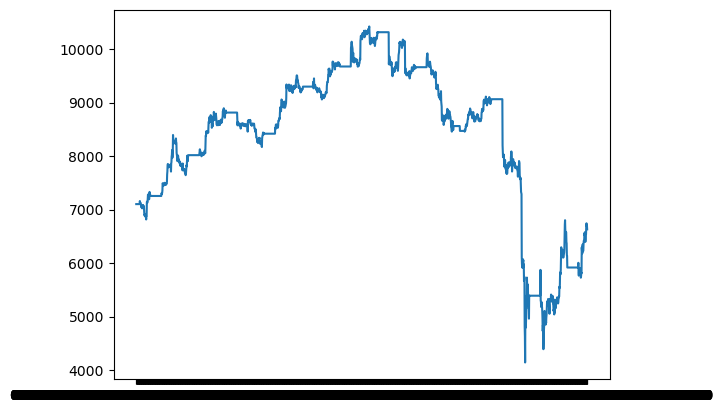

In [207]:
plt.plot(df['Local time'],df['Close'])

In [223]:
import numpy as np
import pandas as pd

def find_support_resistance_optimized(df, zigzag_col='Zigzag_Value', dir_col='Zigzag_Dir', 
                                      price_diff=1, time_diff=500, min_points=3):
    """
    Optimized function to identify support and resistance levels from zigzag points in the DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame containing zigzag points with 'Zigzag_Value' and 'Zigzag_Dir' columns.
        zigzag_col (str): Column name for zigzag values (price levels).
        dir_col (str): Column name for zigzag direction.
        price_diff (float): Maximum percentage price difference for grouping.
        time_diff (int): Maximum time difference (index units) for grouping.
        min_points (int): Minimum points required to confirm a level.

    Returns:
        support_levels (list): List of identified support levels.
        resistance_levels (list): List of identified resistance levels.
    """
    # Extract only rows where zigzag points are present (non-NaN values)
    zigzag_points = df.dropna(subset=[zigzag_col])

    # Pre-compute the price tolerance for grouping
    zigzag_points['Price_Tolerance'] = zigzag_points[zigzag_col] * (price_diff / 100)

    # Lists to store support and resistance levels
    support_levels = []
    resistance_levels = []

    # Use a sliding window for efficient grouping
    visited = set()  # Track visited indices
    for i in range(len(zigzag_points)):
        if i in visited:
            continue

        # Initialize the group with the current zigzag point
        group = [i]
        cur_value = zigzag_points.iloc[i][zigzag_col]
        cur_dir = zigzag_points.iloc[i][dir_col]
        price_tolerance = zigzag_points.iloc[i]['Price_Tolerance']

        # Define price range for grouping
        price_range_min = cur_value - price_tolerance
        price_range_max = cur_value + price_tolerance

        for j in range(i + 1, len(zigzag_points)):
            if j in visited:
                continue

            # Stop if price exceeds the range (sorted by value)
            value_j = zigzag_points.iloc[j][zigzag_col]
            if value_j > price_range_max:
                break

            # Check time and direction constraints
            time_diff_check = abs(zigzag_points.index[j] - zigzag_points.index[i]) <= time_diff
            dir_check = zigzag_points.iloc[j][dir_col] == cur_dir

            if time_diff_check and dir_check:
                group.append(j)
                visited.add(j)

        # Only accept groups with enough points
        if len(group) >= min_points:
            avg_price = zigzag_points.iloc[group][zigzag_col].mean()
            if cur_dir > 0:
                resistance_levels.append(avg_price)
            else:
                support_levels.append(avg_price)

    return sorted(support_levels), sorted(resistance_levels)

support_levels, resistance_levels = find_support_resistance_optimized(df)

/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T/ipykernel_48332/1928972983.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zigzag_points['Price_Tolerance'] = zigzag_points[zigzag_col] * (price_diff / 100)


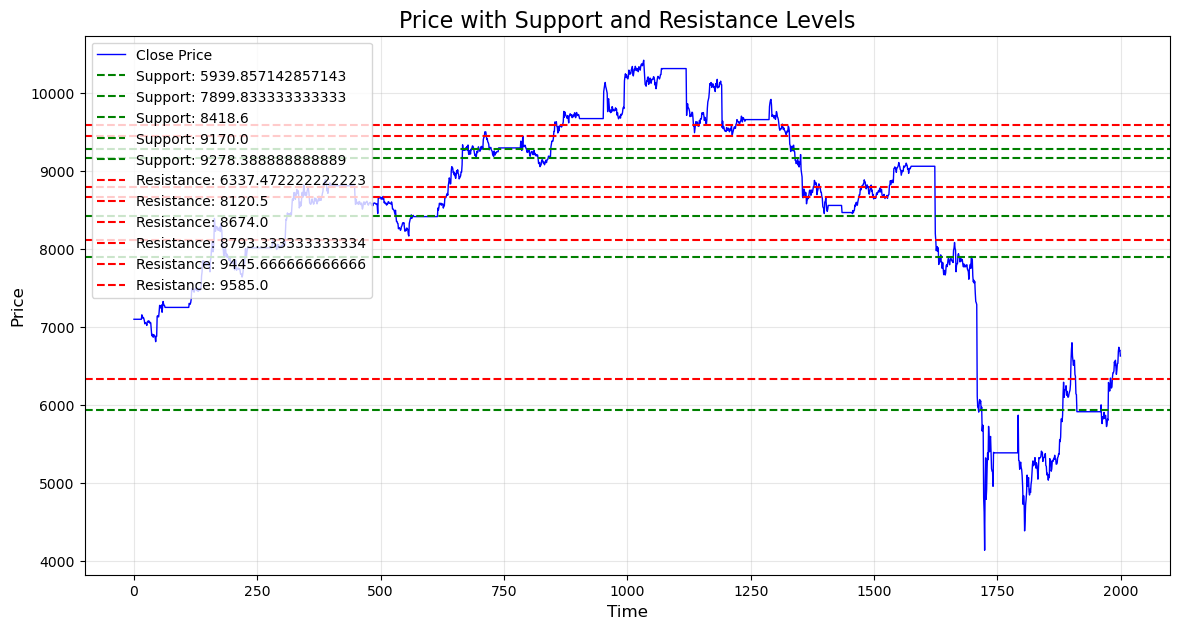

In [224]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1)

# Plot support levels
for level in sorted(support_levels):
    plt.axhline(y=level, color='green', linestyle='--', label=f'Support: {level}')

# Plot resistance levels
for level in sorted(resistance_levels):
    plt.axhline(y=level, color='red', linestyle='--', label=f'Resistance: {level}')

# Add labels, legend, and title
plt.title('Price with Support and Resistance Levels', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

#### Q

In [1]:
import pandas as pd
import yfinance as yf
import trendln

# Fetch historical data
data = yf.download("AAPL", start="2023-01-01", end="2023-11-25")

# Calculate support and resistance
support, resistance = trendln.calc_support_resistance(data['Close'])

print("Support Levels:", support)
print("Resistance Levels:", resistance)


[*********************100%%**********************]  1 of 1 completed


ValueError: Accuracy order acc must be positive EVEN integer